In [ ]:
!pip install opencv-python

In [1]:
import cv2
import random 
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
print(cv2.__version__)

In [26]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.jpg)")
    return fname[0]

In [33]:
image = gui_fname()
image=cv2.imread(image)

In [34]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [35]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

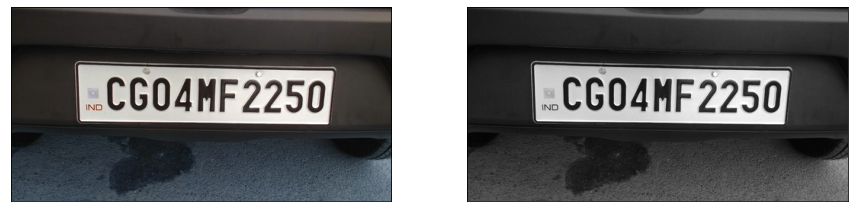

In [36]:
plot_images(image, gray)

In [37]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

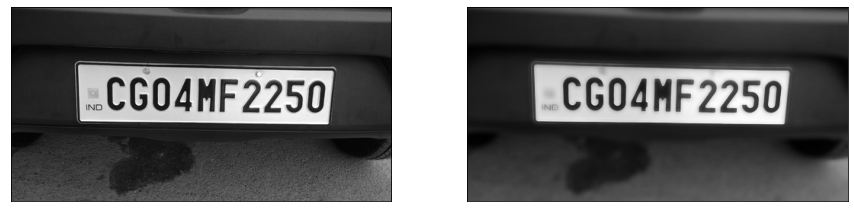

In [38]:
plot_images(gray, blur)

In [39]:
edges = cv2.Canny(blur, 30, 200)

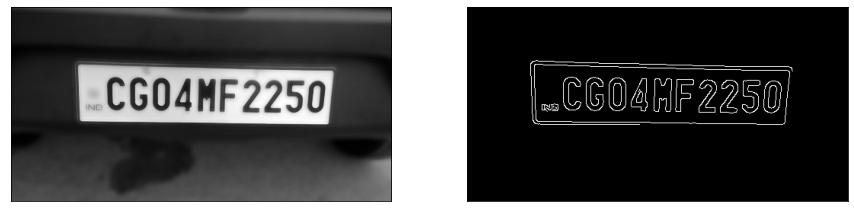

In [40]:
plot_images(blur, edges)

In [41]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [42]:
image_copy = image.copy()

In [43]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

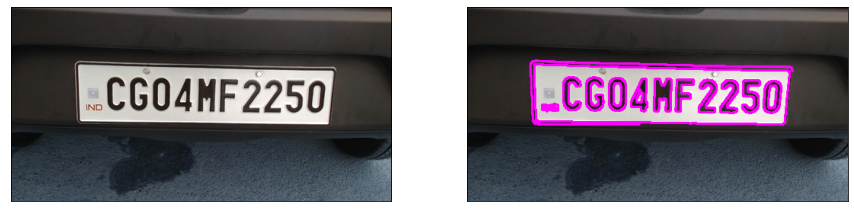

In [44]:
plot_images(image, image_copy)

In [45]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:30]

In [46]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

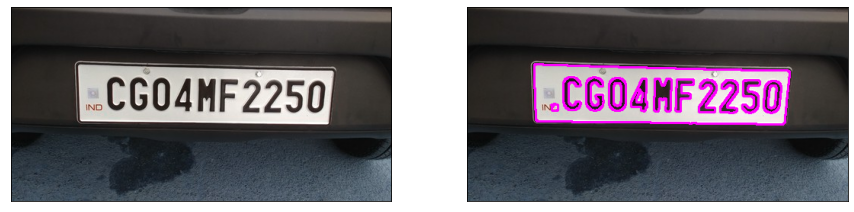

In [47]:
plot_images(image, image_copy)

In [48]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.jpg", plate)

True

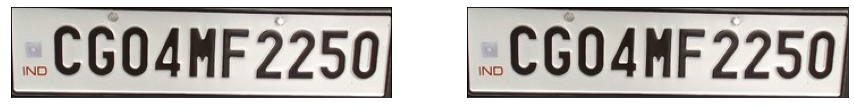

In [49]:
plot_images(plate, plate)

In [50]:
!pip3 install pytesseract

In [ ]:
import pytesseract
from PIL import Image

In [ ]:
#https://github.com/UB-Mannheim/tesseract/wiki

In [60]:
pytesseract.pytesseract.tesseract_cmd="C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe"
im=Image.open("plate.jpg")
print(pytesseract.image_to_string(im,lang='eng'))

-CGO4MF2250,

